In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
df = pd.read_csv('raw data/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.shape

(13320, 9)

In [7]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
for feature in df.columns:
    if df[feature].isnull().sum() > 1:
        print("{} Feature has {}% Missing values ".format(feature,round(df[feature].isnull().mean()*100,1)))

size Feature has 0.1% Missing values 
society Feature has 41.3% Missing values 
bath Feature has 0.5% Missing values 
balcony Feature has 4.6% Missing values 


In [9]:
df1 = df.copy()
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [10]:
df1['society'].fillna("Info Not available",inplace = True)
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Info Not available,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Info Not available,1200,2.0,1.0,51.00


In [11]:
df1['size'].fillna('0',inplace = True)

In [12]:
df1['bath'].fillna(1.0,inplace = True)

In [13]:
df1['balcony'].fillna(0.0,inplace = True)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


df1[~df1['total_sqft'].apply(is_float)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,LedorSa,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,BrereAt,3010 - 3410,1.0,0.0,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,Gollela,2957 - 3450,1.0,0.0,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,Vaarech,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,Sodgere,1804 - 2273,3.0,0.0,122.000
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,Shodsir,1200 - 1470,2.0,0.0,72.760
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,Pardsri,1020 - 1130,1.0,0.0,52.570
13265,Super built-up Area,20-Sep,Hoodi,2 BHK,Ranuetz,1133 - 1384,2.0,0.0,59.135


In [15]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
df1.total_sqft.isnull().sum()

0

In [17]:
df1.total_sqft = df1.total_sqft.apply(convert_sqft_to_num)

In [18]:
df1.total_sqft.isnull().sum() 

46

In [19]:
df1.total_sqft.dropna(axis='index',inplace=True)

In [20]:
df1.total_sqft.isnull().sum()

46

In [21]:
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Info Not available,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Info Not available,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Info Not available,3600.0,5.0,0.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [22]:
df1 = df1.astype({'bath':np.int32, 'balcony':np.int32})

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13320 non-null  object 
 4   society       13320 non-null  object 
 5   total_sqft    13274 non-null  float64
 6   bath          13320 non-null  int32  
 7   balcony       13320 non-null  int32  
 8   price         13320 non-null  float64
dtypes: float64(2), int32(2), object(5)
memory usage: 832.6+ KB


In [24]:
df1['bhk'] = df1['size'].apply(lambda x : int(x.split()[0]))
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2,1,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5,3,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Info Not available,1440.0,2,3,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3,1,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Info Not available,1200.0,2,1,51.00,2
...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4,0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Info Not available,3600.0,5,0,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2,1,60.00,2
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4,1,488.00,4


In [25]:
df1['price_per_sqr'] = round(df1['price'] * 100000 / df1['total_sqft'],2) 

df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqr
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2,1,39.07,2,3699.81
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5,3,120.00,4,4615.38
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Info Not available,1440.0,2,3,62.00,3,4305.56
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3,1,95.00,3,6245.89
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Info Not available,1200.0,2,1,51.00,2,4250.00
...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4,0,231.00,5,6689.83
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Info Not available,3600.0,5,0,400.00,4,11111.11
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2,1,60.00,2,5258.55
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4,1,488.00,4,10407.34


In [26]:
df1.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [27]:
len(df1.location.unique())

1306

In [28]:
location_stats = df1['location'].value_counts() 
location_stats

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [29]:
below_10_dp = location_stats[location_stats <= 10]
below_10_dp

Kalkere                           10
Gunjur Palya                      10
Dodsworth Layout                  10
BTM 1st Stage                     10
Sadashiva Nagar                   10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1064, dtype: int64

In [30]:
df1['location'] = df1['location'].apply(lambda x : 'Others' if x in below_10_dp else x)
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqr
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2,1,39.07,2,3699.81
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5,3,120.00,4,4615.38
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Info Not available,1440.0,2,3,62.00,3,4305.56
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3,1,95.00,3,6245.89
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Info Not available,1200.0,2,1,51.00,2,4250.00
...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4,0,231.00,5,6689.83
13316,Super built-up Area,Ready To Move,Others,4 BHK,Info Not available,3600.0,5,0,400.00,4,11111.11
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2,1,60.00,2,5258.55
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4,1,488.00,4,10407.34


In [31]:
df2 = df1.copy()

In [32]:
df3 = df2[~(df2.total_sqft/df2.bhk < 300)]
df3.shape

(12576, 11)

In [33]:
df3.price_per_sqr.describe()

count     12530.000000
mean       6303.979369
std        4162.238008
min         267.830000
25%        4210.530000
50%        5294.120000
75%        6916.670000
max      176470.590000
Name: price_per_sqr, dtype: float64

In [34]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqr)
        st = np.std(subdf.price_per_sqr)
        reduced_df = subdf[(subdf.price_per_sqr>(m-st)) & (subdf.price_per_sqr<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4 = remove_pps_outliers(df3)
df4.shape

(10303, 11)

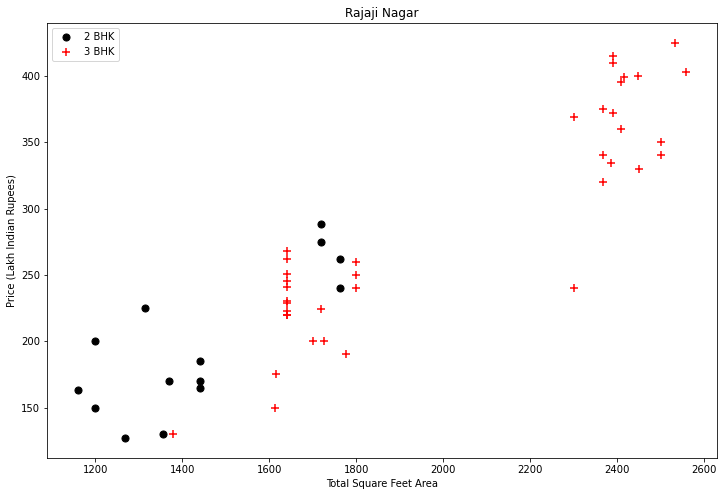

In [35]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    fig = plt.figure(figsize=(12,8))
    fig, plt.scatter(bhk2.total_sqft,bhk2.price,color='black',label='2 BHK', s=50)
    fig, plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='red',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df4,"Rajaji Nagar")

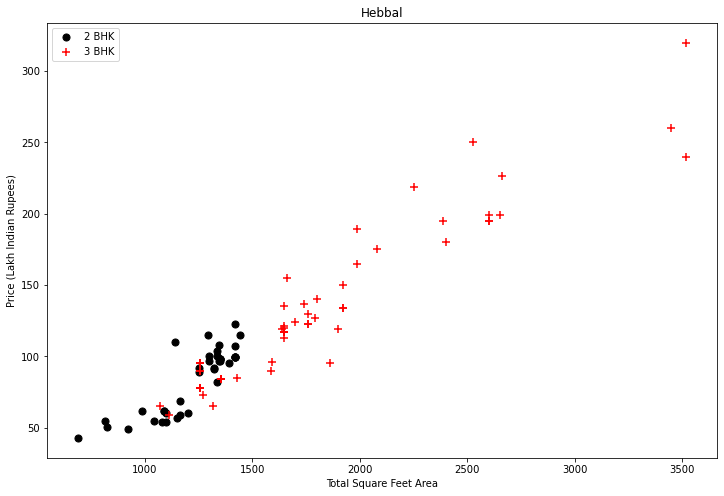

In [36]:
plot_scatter_chart(df4,"Hebbal")

In [37]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqr),
                'std': np.std(bhk_df.price_per_sqr),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqr<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)
df5.shape


(7374, 11)

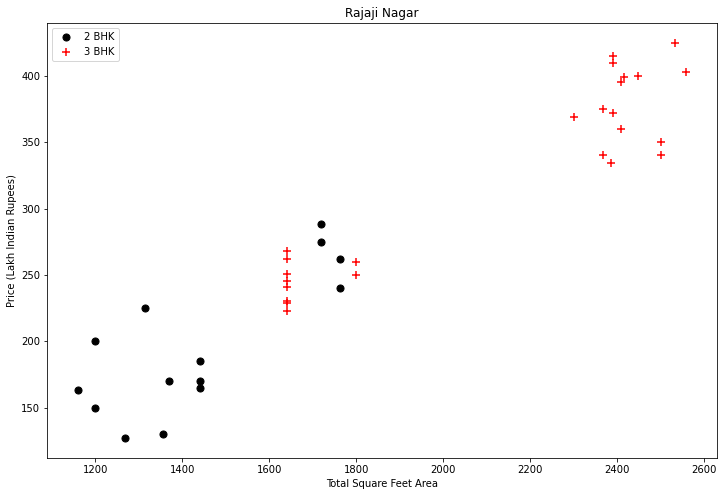

In [38]:
plot_scatter_chart(df5,"Rajaji Nagar")

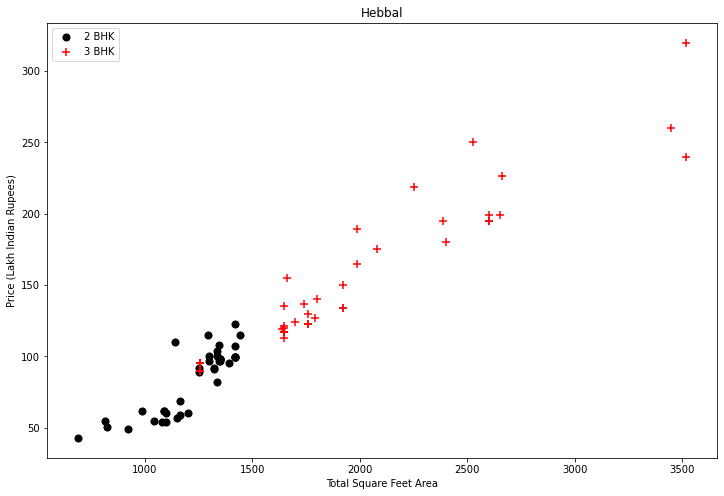

In [39]:
plot_scatter_chart(df5,"Hebbal")


Text(0.5, 1.0, 'Price per sqft distribution')

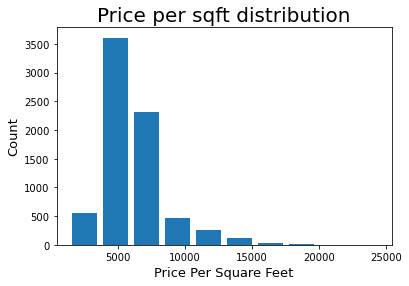

In [40]:
import matplotlib

plt.hist(df5.price_per_sqr,rwidth=0.8)
plt.xlabel("Price Per Square Feet",size = 13)
plt.ylabel("Count", size = 13)
plt.title("Price per sqft distribution", size = 20)

In [41]:
df6 = df5.drop('location',axis='columns')
df6.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,bhk,price_per_sqr
1,Super built-up Area,Ready To Move,2 BHK,Clntsrt,1250.0,2,2,40.0,2,3200.00
2,Plot Area,Ready To Move,2 Bedroom,Info Not available,1200.0,2,2,83.0,2,6916.67
3,Super built-up Area,Ready To Move,2 BHK,Info Not available,1170.0,2,2,40.0,2,3418.80
4,Super built-up Area,Ready To Move,3 BHK,Shireru,1425.0,2,2,65.0,3,4561.40
5,Super built-up Area,Ready To Move,2 BHK,Info Not available,947.0,2,2,43.0,2,4540.65


In [42]:
def LinearEquationPlot(df5,location):
    xy = df6[(df5.location==location)]
    fig = plt.figure(figsize=(20,10))
    sns.regplot(x='total_sqft', y='price', data=xy,ci = 68)

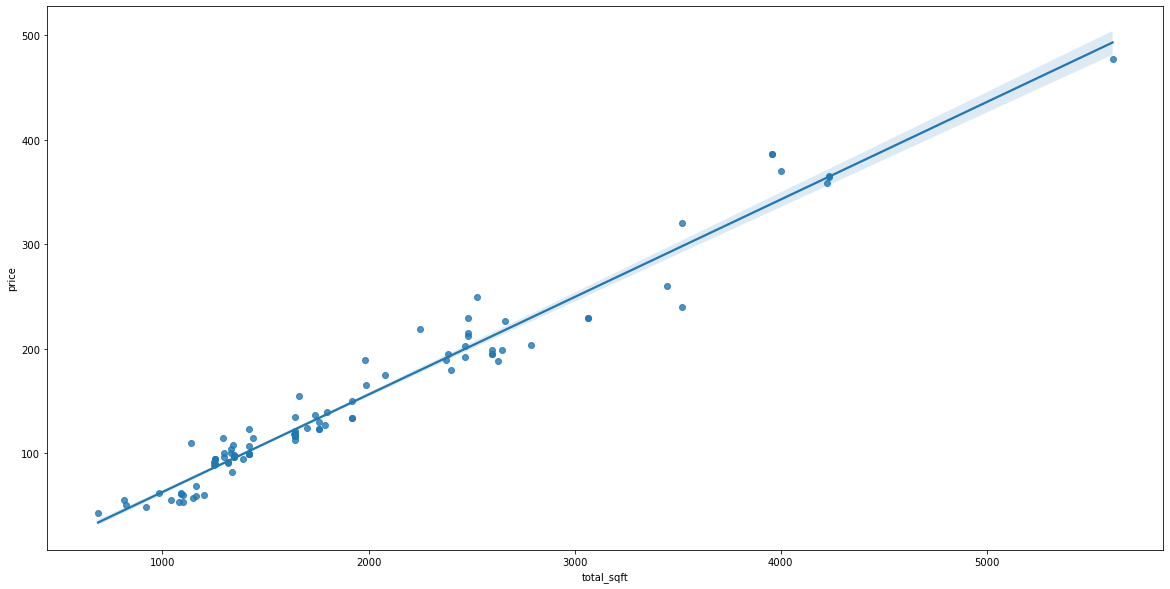

In [43]:
LinearEquationPlot(df5,'Hebbal')